In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv('climate_change.csv')
dataset

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [3]:
dataset.info()
dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


Year         26
Month        12
MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64

In [4]:
dataset.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [5]:
dataset.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


<AxesSubplot:>

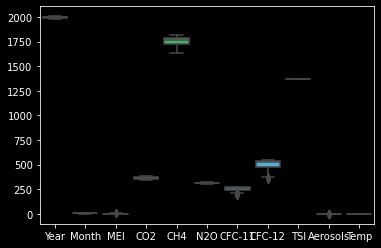

In [6]:
sns.boxplot(data=dataset)

<AxesSubplot:>

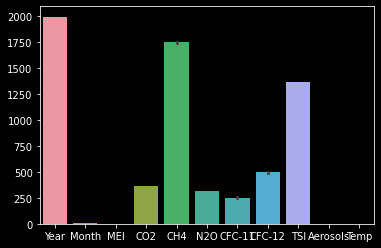

In [7]:
sns.barplot(data=dataset)

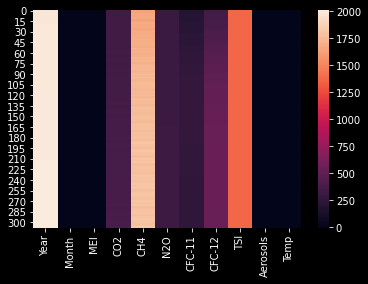

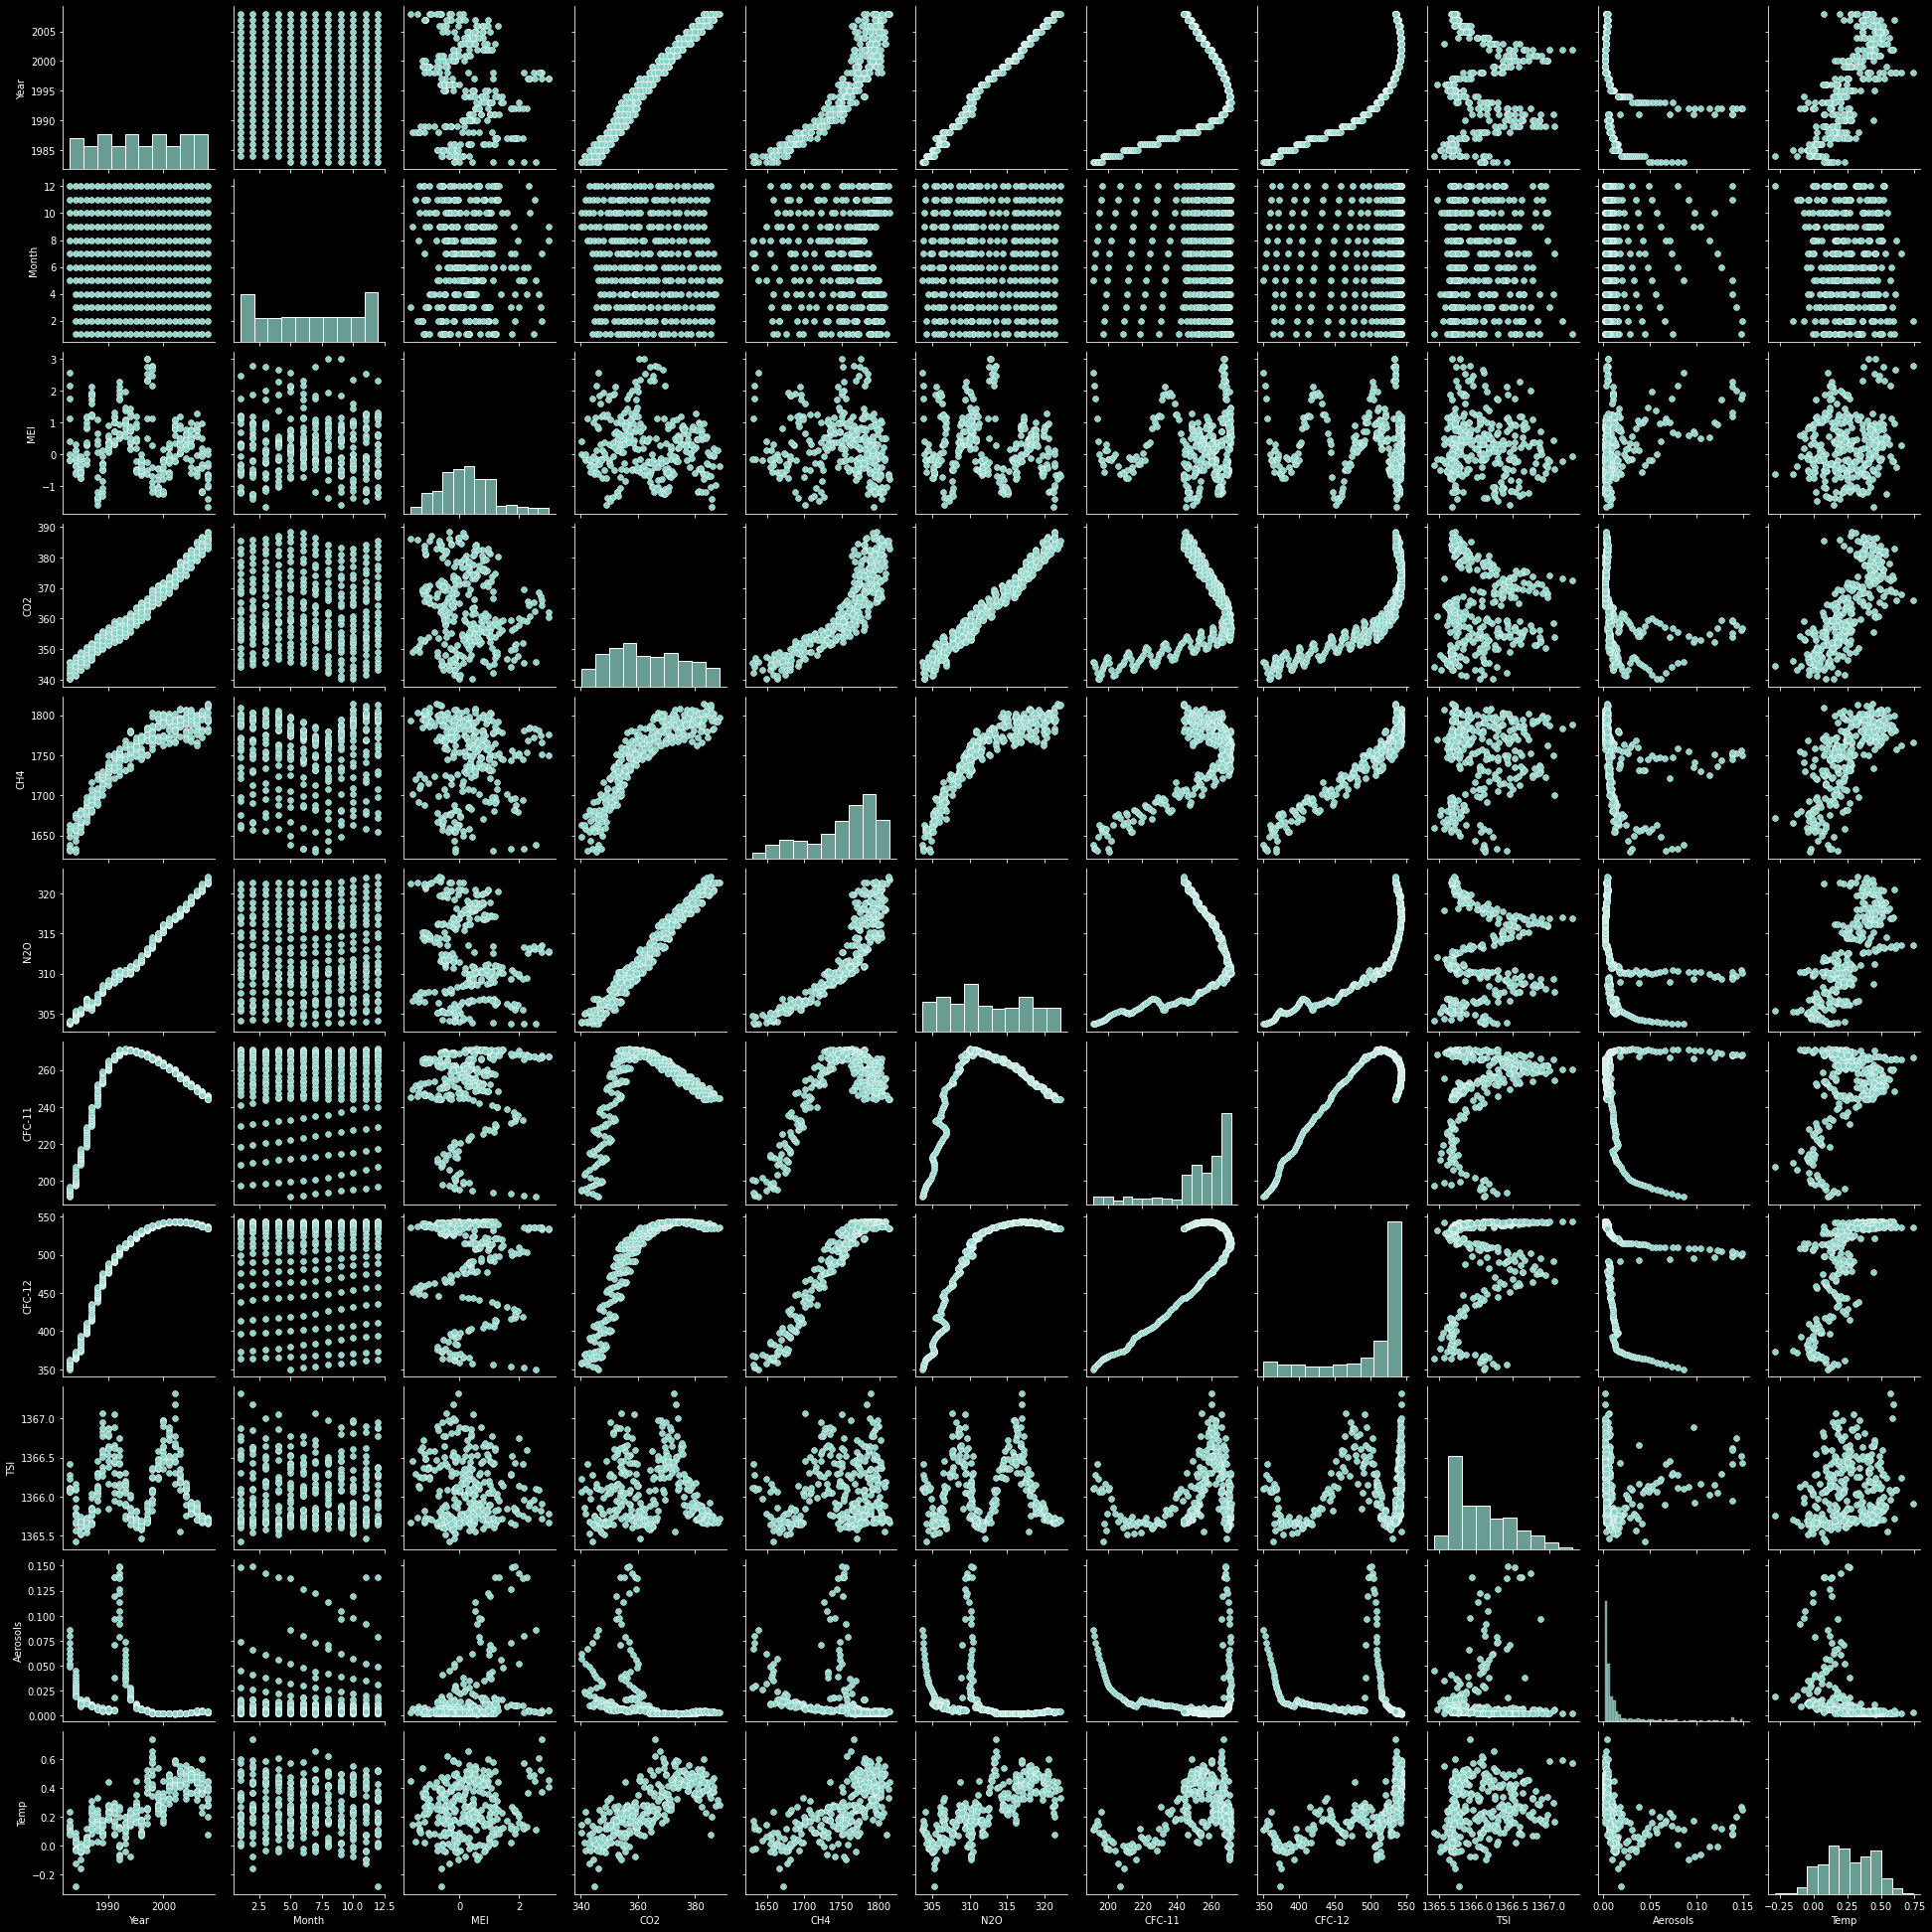

In [8]:
sns.heatmap(dataset)
sns.pairplot(dataset)

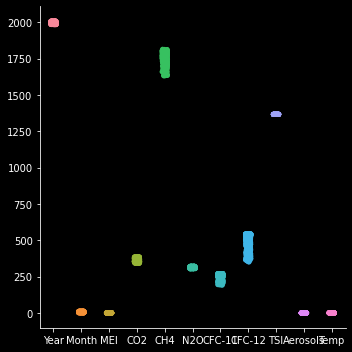

In [9]:
sns.catplot(data=dataset)

In [10]:
x = dataset.iloc[:,:-1].values
x

array([[ 1.9830000e+03,  5.0000000e+00,  2.5560000e+00, ...,
         3.5011300e+02,  1.3661024e+03,  8.6300000e-02],
       [ 1.9830000e+03,  6.0000000e+00,  2.1670000e+00, ...,
         3.5184800e+02,  1.3661208e+03,  7.9400000e-02],
       [ 1.9830000e+03,  7.0000000e+00,  1.7410000e+00, ...,
         3.5372500e+02,  1.3662850e+03,  7.3100000e-02],
       ...,
       [ 2.0080000e+03,  1.0000000e+01, -7.8000000e-01, ...,
         5.3492700e+02,  1.3656759e+03,  4.6000000e-03],
       [ 2.0080000e+03,  1.1000000e+01, -6.2100000e-01, ...,
         5.3490600e+02,  1.3657065e+03,  4.8000000e-03],
       [ 2.0080000e+03,  1.2000000e+01, -6.6600000e-01, ...,
         5.3500500e+02,  1.3656926e+03,  4.6000000e-03]])

In [11]:
y = dataset.iloc[:,-1].values
y

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

In [12]:
SC = StandardScaler ()
x[:,:] = SC.fit_transform(x[:,:])

In [13]:
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 ,random_state = 0)

In [14]:
RFR = RandomForestRegressor ()
RFR.fit (x_train , y_train)

RandomForestRegressor()

In [15]:
y_pred = RFR.predict(x_test)

In [16]:
y_pred

array([ 1.2835e-01,  4.5753e-01,  3.5521e-01,  6.0720e-02,  3.5211e-01,
        2.4124e-01,  3.3665e-01,  1.3190e-01, -8.2600e-03,  1.1548e-01,
        4.6853e-01,  1.8382e-01,  3.4847e-01,  1.9235e-01, -8.6320e-02,
        3.1685e-01,  4.2933e-01,  4.2893e-01,  4.5843e-01,  4.8399e-01,
        3.0746e-01,  1.7700e-03,  1.8556e-01,  1.8898e-01,  2.6814e-01,
        4.3000e-04,  1.3039e-01,  4.5791e-01,  1.6715e-01,  2.3684e-01,
        3.3287e-01,  4.2056e-01,  1.6310e-01,  4.6995e-01,  5.2090e-01,
        1.7633e-01,  2.8374e-01,  4.5437e-01,  1.9755e-01,  4.2170e-01,
        1.9108e-01,  1.3198e-01,  1.7320e-01, -1.7900e-02,  2.0180e-01,
        2.9950e-02,  1.8586e-01,  2.4830e-01,  1.3239e-01,  4.2940e-01,
        2.9297e-01,  5.9318e-01,  4.1492e-01,  1.5906e-01,  2.1801e-01,
        1.8719e-01,  4.7076e-01,  2.5280e-02,  1.4648e-01,  3.8460e-02,
       -8.2230e-02,  4.1991e-01])

In [17]:
r2 = r2_score(y_test , y_pred)
r2

0.8915036848987611

In [18]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,0.154,0.12835
1,0.519,0.45753
2,0.362,0.35521
3,0.013,0.06072
4,0.366,0.35211
...,...,...
57,0.049,0.02528
58,0.125,0.14648
59,0.065,0.03846
60,-0.155,-0.08223


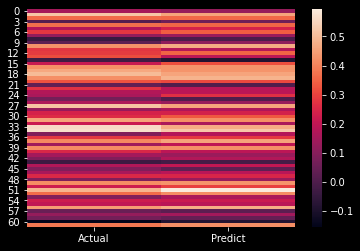

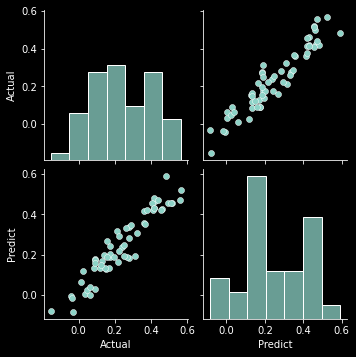

In [19]:
sns.heatmap(df_comp)
sns.pairplot(df_comp)

<AxesSubplot:>

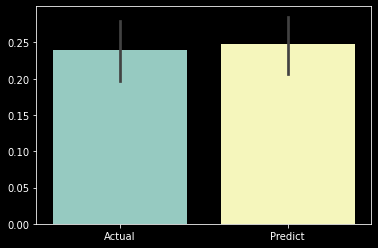

In [30]:
sns.barplot(data=df_comp)